### **Vamos a intentar predecir el valor de la moneda al final del dia teniendo en cuenta el valor inicial (Open) y el valor final (Price).** **Tambien podemos intentar predecir el peak de la moneda en ese dia (High) y el valor mas bajo en ese dia (Low)**

### **Descripción de las columnas**:

- *Date*: A specific date within each day of trading, denoting when the Bitcoin price was recorded.

- *Price*: Bitcoin's price at a specific time during the daily trading period, denoting its value in the respective currency (USD).

- *Open*: Bitcoin's opening price at the start of each day's trading period, illustrating the starting price for Bitcoin trading during that day.

- *High*: The peak price of Bitcoin reached during each day's trading period, offering insight into Bitcoin's highest value attained within that day.

- *Low*: The lowest price of Bitcoin observed during each day's trading period, reflecting Bitcoin's lowest value within that day.

- *Vol.* (Volume): Bitcoin's trading volume within a specific unit (e.g., number of Bitcoins traded) during each day's trading period,
   providing insight into trading activity in the Bitcoin market.

- *Change %*: The percentage change in Bitcoin's price from the opening to the closing price within each day of trading,
   indicating the relative price shift compared to the opening price.

### **Columnas necesarias**:
- *Price, Open, High, Low*

In [2]:
#Libreria de manejo y tratamiento de datos

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Libreria de visualizacion de datos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libreria para el Conteo de Numeros

from collections import Counter

#Libreria para eliminar los warnings

import warnings

# Ignora todas las advertencias

warnings.filterwarnings("ignore")


#Libreria de Modelos de Machine Learning

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn import model_selection, ensemble, preprocessing, base, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier

#Libreria de TensorFlow para Deep Learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout

#Libreria de entrenamiento de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import imblearn

# GridSearchCV

from sklearn.model_selection import GridSearchCV

#Libreria de Metricas

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = (20, 8)

In [3]:
df_Bitcoin = pd.read_csv('Bitcoin_Historical_Data.csv')
df_Bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,03/10/2024,"69,437.1","68,360.7","69,676.4","68,250.3",37.43K,1.57%
1,03/09/2024,"68,366.5","68,178.5","68,576.9","67,923.9",30.71K,0.29%
2,03/08/2024,"68,172.0","66,854.4","69,904.0","66,170.7",112.67K,1.97%
3,03/07/2024,"66,855.3","66,074.6","67,985.5","65,602.6",77.47K,1.17%
4,03/06/2024,"66,080.4","63,794.7","67,604.9","62,848.7",117.91K,3.59%
...,...,...,...,...,...,...,...
4980,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
4981,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
4982,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
4983,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%


In [4]:
# Cambio de formato columna Change %

df_Bitcoin['Change %'] = df_Bitcoin['Change %'].str.replace('%', '')
    
df_Bitcoin['Change %'] = df_Bitcoin['Change %'].apply(pd.to_numeric, downcast='float') 

df_Bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,03/10/2024,"69,437.1","68,360.7","69,676.4","68,250.3",37.43K,1.57
1,03/09/2024,"68,366.5","68,178.5","68,576.9","67,923.9",30.71K,0.29
2,03/08/2024,"68,172.0","66,854.4","69,904.0","66,170.7",112.67K,1.97
3,03/07/2024,"66,855.3","66,074.6","67,985.5","65,602.6",77.47K,1.17
4,03/06/2024,"66,080.4","63,794.7","67,604.9","62,848.7",117.91K,3.59
...,...,...,...,...,...,...,...
4980,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00
4981,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00
4982,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00
4983,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00


In [5]:
# Cambio de formato columna Date de object a datetime

df_Bitcoin['Date'] = pd.to_datetime(df_Bitcoin['Date'])

print(df_Bitcoin.dtypes)

df_Bitcoin

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %           float32
dtype: object


,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,"69,437.1","68,360.7","69,676.4","68,250.3",37.43K,1.57
1,2024-03-09,"68,366.5","68,178.5","68,576.9","67,923.9",30.71K,0.29
2,2024-03-08,"68,172.0","66,854.4","69,904.0","66,170.7",112.67K,1.97
3,2024-03-07,"66,855.3","66,074.6","67,985.5","65,602.6",77.47K,1.17
4,2024-03-06,"66,080.4","63,794.7","67,604.9","62,848.7",117.91K,3.59
...,...,...,...,...,...,...,...
4980,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00
4981,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00
4982,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00
4983,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00


In [6]:
# Cambio de formato columnas Price, Open, High, Low

for col in df_Bitcoin.columns[1:5]:

    df_Bitcoin[col] = df_Bitcoin[col].str.replace(',', '')
    
    df_Bitcoin[col] = df_Bitcoin[col].apply(pd.to_numeric, downcast='float')

df_Bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,69437.1,68360.7,69676.4,68250.3,37.43K,1.57
1,2024-03-09,68366.5,68178.5,68576.9,67923.9,30.71K,0.29
2,2024-03-08,68172.0,66854.4,69904.0,66170.7,112.67K,1.97
3,2024-03-07,66855.3,66074.6,67985.5,65602.6,77.47K,1.17
4,2024-03-06,66080.4,63794.7,67604.9,62848.7,117.91K,3.59
...,...,...,...,...,...,...,...
4980,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00
4981,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00
4982,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00
4983,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00


In [7]:
# Formateo columna 'Vol.'

df_Bitcoin['Vol.'] = df_Bitcoin['Vol.'].str.replace('.', '')
df_Bitcoin['Vol.'] = df_Bitcoin['Vol.'].str.replace('K', '0')
df_Bitcoin['Vol.'] = df_Bitcoin['Vol.'].str.replace('M', '0000')
df_Bitcoin['Vol.'] = df_Bitcoin['Vol.'].str.replace('B', '0000000')

# Eliminar los Nan's de la columna Vol.

df_Bitcoin = df_Bitcoin.dropna(subset=['Vol.'])

# Convertir la columna Vol. a un integer 64 bits

df_Bitcoin['Vol.'] = df_Bitcoin['Vol.'].astype('int64')

print(df_Bitcoin.dtypes)

df_Bitcoin.head()

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                 int64
Change %           float32
dtype: object


,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,69437.1,68360.7,69676.4,68250.3,37430,1.57
1,2024-03-09,68366.5,68178.5,68576.9,67923.9,30710,0.29
2,2024-03-08,68172.0,66854.4,69904.0,66170.7,112670,1.97
3,2024-03-07,66855.3,66074.6,67985.5,65602.6,77470,1.17
4,2024-03-06,66080.4,63794.7,67604.9,62848.7,117910,3.59


In [8]:
# Hacer un filtrado del DataFrame a partir del dia 01/01/2017

df_Bitcoin_Filtrado = df_Bitcoin[df_Bitcoin['Date'] >= '2017-01-01']

df_Bitcoin_Filtrado

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,69437.100000,68360.700000,69676.400000,68250.300000,37430,1.57
1,2024-03-09,68366.500000,68178.500000,68576.900000,67923.900000,30710,0.29
2,2024-03-08,68172.000000,66854.400000,69904.000000,66170.700000,112670,1.97
3,2024-03-07,66855.300000,66074.600000,67985.500000,65602.600000,77470,1.17
4,2024-03-06,66080.400000,63794.700000,67604.900000,62848.700000,117910,3.59
...,...,...,...,...,...,...,...
2621,2017-01-05,989.299988,1135.400024,1150.599976,874.500000,240010,-12.86
2622,2017-01-04,1135.400024,1033.300049,1148.500000,1022.299988,156270,9.88
2623,2017-01-03,1033.300049,1017.000000,1035.500000,1006.500000,54790,1.60
2624,2017-01-02,1017.000000,995.400024,1031.699951,990.200012,64950,2.17


In [9]:
# Grafica de lineas para ver la evolucion del tiempo

px.line(data_frame = df_Bitcoin_Filtrado,
        title = "Histórico Bitcoin",
        x = "Date",
        y = ["Price"],
        labels = {"Date": "Año", "Price":"Precio"})

In [10]:
# Crear un mapa de calor para ver la correlacion entre las columnas

fig = px.imshow(
    img = df_Bitcoin[["Date", "Price", "Open", "High", "Low", "Vol."]].corr(),
    color_continuous_scale = "Earth",
    text_auto = True
)

# Configurar el tamaño de la figura

fig.update_layout(
    width=800,  
    height=600)

fig.show()

### **3º Modelos**

*Una vez que todas las columnas las tenemos trabajadas, se va a empezar a tratar el DataFrame definiendo las variables X e y*

In [11]:
X = df_Bitcoin_Filtrado[['Open']].values
y = df_Bitcoin_Filtrado[["Price"]].values

print(X.shape, y.shape)

(2626, 1) (2626, 1)


In [12]:
pd.DataFrame(X)

,0
0,68360.700000
1,68178.500000
2,66854.400000
3,66074.600000
4,63794.700000
...,...
2621,1135.400024
2622,1033.300049
2623,1017.000000
2624,995.400024


In [13]:
# Normalizacion de X con MinMaxScaler

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


# Normalizacion de y

scaler_y = MinMaxScaler()

scaler_y.fit(y.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz

y = scaler_y.transform(y.reshape(-1, 1))

print(X[0].mean(), y[0].mean())

1.0 1.0000000000000002


In [14]:
# Separacion de train y test con las variables X e Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (1838, 1), y_train: (1838, 1)
X_test: (788, 1),  y_test: (788, 1)


In [15]:
# Función para calcular el promedio

def avg(x):
    return np.sum(x) / len(x)

# Modelos de regresión

models = [
    LinearRegression(),
    SVR(),
    AdaBoostRegressor(n_estimators=151, random_state=31),
    RandomForestRegressor(n_estimators=151),
    KNeighborsRegressor(n_neighbors=6, n_jobs=-1)
]

model_names = [
    "Regresión Lineal",
    "SVR",
    "AdaBoost",
    "Random Forest",
    "KNN"
]

scores = []

# Bucle para evaluar cada modelo y puntuarlo

for idx, model in enumerate(models):
    # Entrena cada modelo utilizando cross_val_score con validación cruzada de 5 divisiones
    scores.append(avg(cross_val_score(model, X_train, y_train, cv=5)))
    print(f"{model_names[idx]} entrenamiento completado !")


model_scores = {x : y for x, y in zip(model_names, scores)}
print(model_scores)

Regresión Lineal entrenamiento completado !
SVR entrenamiento completado !


AdaBoost entrenamiento completado !
Random Forest entrenamiento completado !
KNN entrenamiento completado !
{'Regresión Lineal': 0.9967661683859292, 'SVR': 0.9557540224727049, 'AdaBoost': 0.9923581573891948, 'Random Forest': 0.9950534815882893, 'KNN': 0.9962505049337909}


#### *Como el mejor modelo es la Regresion Lineal, se va a probar con Regresion Lineal*

In [16]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Se halla los coeficientes de la recta  

print ("w_1:", model.coef_)

print ("w_0:", model.intercept_)

w_1: [[0.9826764]]
w_0: [0.00066106]


In [18]:
### Grafico de la Regresión

b = model.intercept_[0]
m = model.coef_[0][0]

# Ecuación de una recta: y = m*x + b

print(f"y = {m}x + {b}")

y = 0.9826763957946123x + 0.00066106207643013


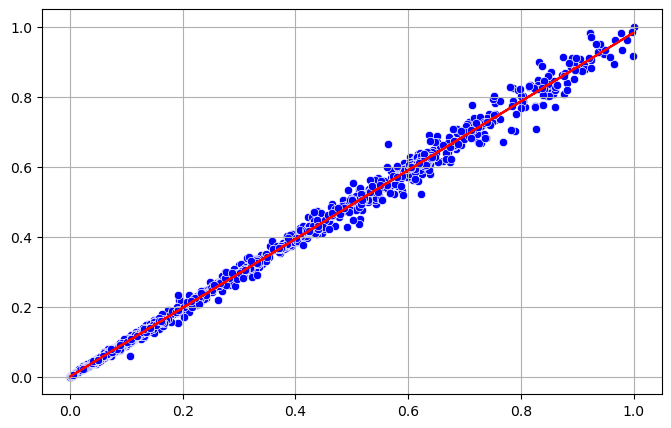

In [19]:
# Grafica para representar los puntos y la recta de Regresion

plt.figure(figsize = (8, 5))

# Puntos de entrenamiento (X_train, y_train)

sns.scatterplot(x = X_train.flatten(), y = y_train.flatten(), color = "blue")

# Plot de la Regresión

ecuacion_recta = m*X_train.flatten() + b # Ecuación de la recta y = m*x + b

plt.plot(X_train.flatten(), ecuacion_recta, "red")

plt.grid()

plt.show()

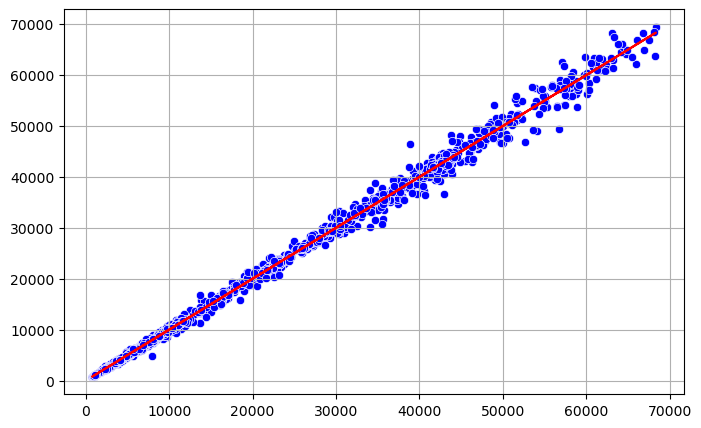

In [20]:
# Si se quiere obtener la grafica con los datos originales:

X_train_natural = scaler_x.inverse_transform(X_train) # Transformacion inversa de los X_train

y_train_natural = scaler_y.inverse_transform(y_train) # Transformacion inversa de los y_train

plt.figure(figsize = (8, 5))

# Puntos de entrenamiento (X_train, y_train escala original) 

sns.scatterplot(x = X_train_natural.flatten(), y = y_train_natural.flatten(), color = "blue")


# Plot de la Regresión

ecuacion_recta = m*X_train.flatten() + b # Ecuación de la recta

# Usamos y_scaler para transformar los resultados a la escala original

resultados_escalados = scaler_y.inverse_transform(ecuacion_recta.reshape(-1, 1)) 

plt.plot(X_train_natural.flatten(), resultados_escalados, "red")

plt.grid()

plt.show()

### **Predicciones**: *Una vez hallada la ecuacion de la recta, vamos a predecir los futuros valores*

In [21]:
yhat = model.predict(X_test)

# Obtencion de los valores predictivos, valores reales y valor de X

for i, j, k in zip(yhat[:20], y_test[:20], X_test[:20]):
    print(f"Predicción: {i[0]:20} \tValor real: {j[0]:20}\tValor X: {k[0]}")

Predicción:  0.42130722245739527 	Valor real:  0.41351197400328676	Valor X: 0.4280617324086858
Predicción:  0.40258737475026807 	Valor real:   0.4179139100184542	Valor X: 0.40901187246777415
Predicción:   0.6702420791261484 	Valor real:   0.7032440564873846	Valor X: 0.6813850621783597
Predicción:  0.12245131770832121 	Valor real:  0.11977707446716805	Valor X: 0.12393729629926542
Predicción: 0.060531709585158334 	Valor real:  0.06153962935223556	Valor X: 0.06092610727696941
Predicción:  0.23800744691857212 	Valor real:  0.23569846021788673	Valor X: 0.24153056474936374
Predicción:   0.5486975820347864 	Valor real:   0.5495654148258974	Valor X: 0.5576978568974404
Predicción:   0.6158290237773343 	Valor real:   0.6344256586664984	Valor X: 0.626012758964732
Predicción:   0.6210364948127745 	Valor real:   0.6088079390670501	Valor X: 0.6313120325177812
Predicción:  0.24608403831459322 	Valor real:   0.2474694667575992	Valor X: 0.24974953839173986
Predicción:   0.5521760156334384 	Valor real: 

### **Métricas**: *Ahora se va a calcular las siguientes metricas (RAE, RSE, MSE, MAE, R2 y R2 ajustado)*

In [22]:
yhat_natural = scaler_y.inverse_transform(yhat)
ytest_natural = scaler_y.inverse_transform(y_test)

In [23]:
ytest_natural.mean()

19691.20684771078

In [24]:
# Error Absoluto Relativo

RAE = np.sum(np.abs(np.subtract(ytest_natural, yhat_natural))) / np.sum(np.abs(np.subtract(ytest_natural, np.mean(ytest_natural))))

print(f"RAE: {RAE}")

RAE: 0.03427392253069502


In [25]:
# Error Absoluto Cuadratico

RSE = np.sum(np.square(np.subtract(ytest_natural, yhat_natural))) / np.sum(np.square(np.subtract(ytest_natural, np.mean(ytest_natural))))

print(f"RSE: {RSE}")

RSE: 0.0027649325035080104


In [26]:
# R**2 Ajustado

r2_ajustada = 1 - (1 - model.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

print(f"Adjusted R**2: {r2_ajustada}")

Adjusted R**2: 0.9972315497706606


In [27]:
# Metricas

print(f"MAE:\t {mean_absolute_error(ytest_natural, yhat_natural)}")
print(f"MSE:\t {mean_squared_error(ytest_natural, yhat_natural)}")
print(f"RMSE:\t {np.sqrt(mean_squared_error(ytest_natural, yhat_natural))}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 473.6654908329961
MSE:	 741930.0142394523
RMSE:	 861.3535941989517
R**2:	 0.997235067496492
RAE:	 0.03427392253069502
RSE:	 0.0027649325035080104
Adjusted R**2:	 0.9972315497706606


In [28]:
ytest_natural.mean()

19691.20684771078

### **Diferencias entre y_test vs yhat**

In [29]:
# Se va a ver los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform(y_test).flatten()
df_pred["yhat"] = scaler_y.inverse_transform(yhat).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
88,5658.299805,5658.304426,0.0001
317,4612.899902,4612.853739,0.0010
284,45564.300000,45563.724749,0.0013
675,15180.099609,15177.873914,0.0147
72,41832.200000,41825.680175,0.0156
654,34283.100000,34289.391768,0.0184
38,5302.299805,5303.598204,0.0245
455,8439.900391,8437.553885,0.0278
373,6365.899902,6364.023344,0.0295
334,50786.100000,50769.213630,0.0332


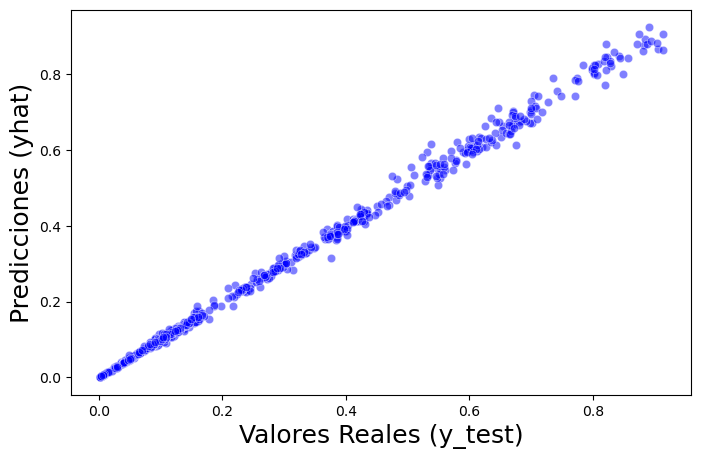

In [30]:
# Se va a comparar como de alejados estan los valores reales (y_test) y los valores predichos (yhat)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = yhat.flatten(), y = y_test.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_test)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

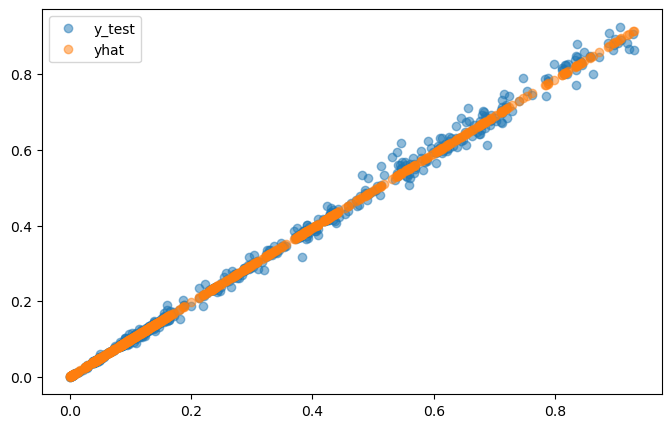

In [31]:
# Si graficamos X_test vs y_test obtenemos la nube de puntos de valores reales
# Si graficamos X_test vs yhat obtenemos la "nube" de puntos de valores predichos

plt.figure(figsize = (8, 5))

plt.plot(X_test, y_test, marker = "o", linestyle = "", label = "y_test", alpha = 0.5) # Valores reales

plt.plot(X_test, yhat, marker = "o", linestyle = "", label = "yhat", alpha = 0.5) # Valores Predichos

plt.legend()

plt.show()

#### **Conclusiones**: *los modelos en general, tienen muy buena optimizacion pero el modelo de regresion lineal se adapta muy bien a esta base de datos*

### **Entrenamiento con RNN**

In [32]:
df_Bitcoin_Filtrado

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-10,69437.100000,68360.700000,69676.400000,68250.300000,37430,1.57
1,2024-03-09,68366.500000,68178.500000,68576.900000,67923.900000,30710,0.29
2,2024-03-08,68172.000000,66854.400000,69904.000000,66170.700000,112670,1.97
3,2024-03-07,66855.300000,66074.600000,67985.500000,65602.600000,77470,1.17
4,2024-03-06,66080.400000,63794.700000,67604.900000,62848.700000,117910,3.59
...,...,...,...,...,...,...,...
2621,2017-01-05,989.299988,1135.400024,1150.599976,874.500000,240010,-12.86
2622,2017-01-04,1135.400024,1033.300049,1148.500000,1022.299988,156270,9.88
2623,2017-01-03,1033.300049,1017.000000,1035.500000,1006.500000,54790,1.60
2624,2017-01-02,1017.000000,995.400024,1031.699951,990.200012,64950,2.17


In [33]:
df_Bitcoin_Filtrado = df_Bitcoin_Filtrado.sort_values(by='Date', ascending=True)
df_Bitcoin_Filtrado = df_Bitcoin_Filtrado.reset_index(drop=True)
df_Bitcoin_Filtrado.head(3)


,Date,Price,Open,High,Low,Vol.,Change %
0,2017-01-01,995.400024,963.400024,1001.599976,956.099976,41150,3.33
1,2017-01-02,1017.000000,995.400024,1031.699951,990.200012,64950,2.17
2,2017-01-03,1033.300049,1017.000000,1035.500000,1006.500000,54790,1.60


In [34]:
df_Bitcoin_Filtrado.tail(3)

,Date,Price,Open,High,Low,Vol.,Change %
2623,2024-03-08,68172.0,66854.4,69904.0,66170.7,112670,1.97
2624,2024-03-09,68366.5,68178.5,68576.9,67923.9,30710,0.29
2625,2024-03-10,69437.1,68360.7,69676.4,68250.3,37430,1.57


In [35]:
# Preprocesamiento

datos = df_Bitcoin_Filtrado.drop(["Date", "Open", "High", "Low", "Vol.", "Change %"], axis = 1)

scaler = MinMaxScaler()
datos = scaler.fit_transform(datos)

datos.shape

(2626, 1)

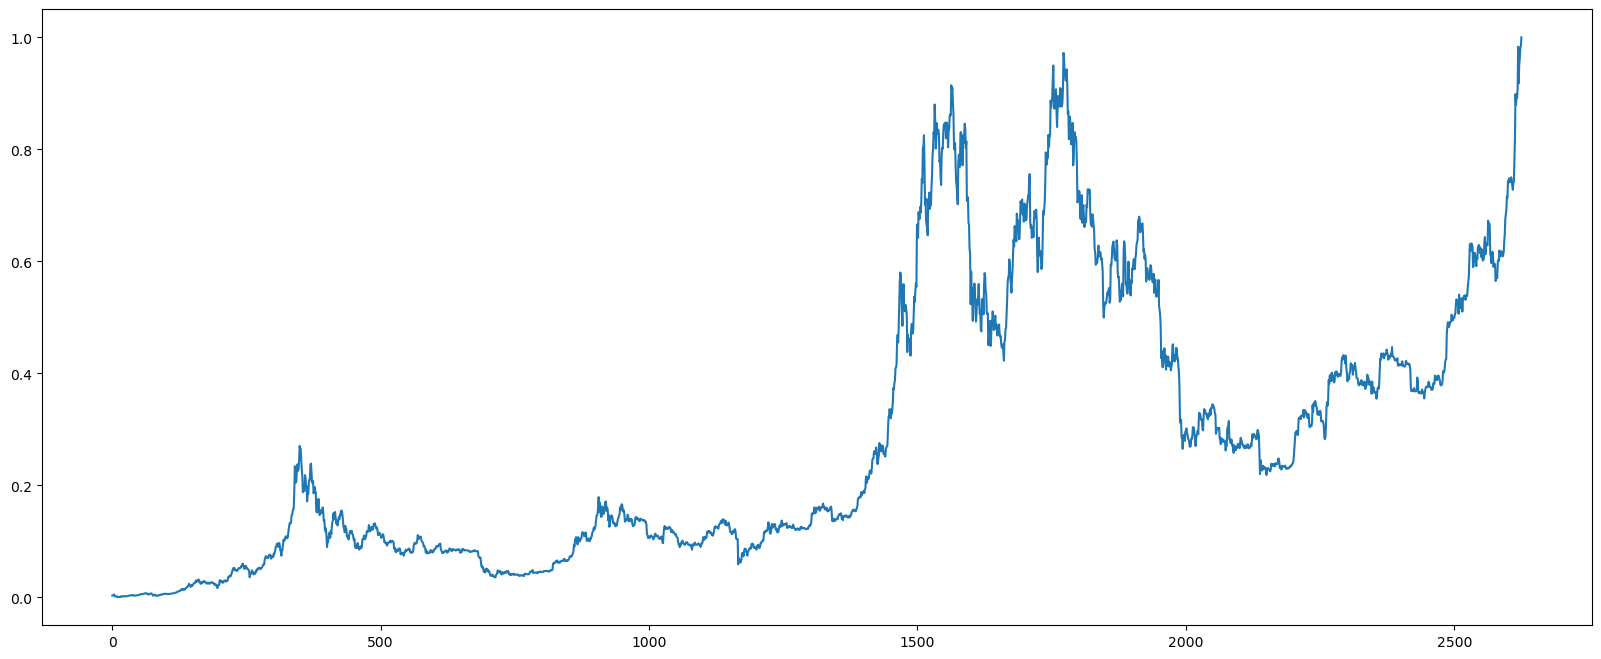

In [36]:
plt.plot(datos)
plt.show()

In [37]:
T = 20 # Segmentos
X = list()
y = list()

for t in range(len(datos) - T): 
    
    x = datos[t : t + T] # Toma valores de X de t en t con stride de 1
    X.append(x)
    
    y_ = datos[t + T] # Toma los valores de t en t
    y.append(y_)

# Transformamos X a np.array y ajustamos las dimensiones
# Para entrar en el modelo debe de tener 3 dimensiones
X = np.array(X).reshape(-1, T, 1)
y = np.array(y)
N = len(X)

print(f"X: {X.shape}\ty: {y.shape}")

X: (2606, 20, 1)	y: (2606, 1)


In [38]:
#Aplicacion del modelo Secuencial con distintas densidades

model = Sequential()

model.add(Input(shape = (T, 1))) # Capa de Entrada

model.add(SimpleRNN(units = 200, activation = "relu")) # Capas Ocultas

model.add(Dense(units = 60, activation = "relu")) 
model.add(Dense(units = 30, activation = "relu")) 
model.add(Dense(units = 15, activation = "relu")) 
model.add(Dense(units = 1)) # Capa de Salida

model.compile(optimizer = "adam", loss = "mse")

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 200)               40400     
                                                                 
 dense (Dense)               (None, 60)                12060     
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 54771 (213.95 KB)
Trainable params: 54771 (213.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = model.fit(x = X[:300],
                    y = y[:300],
                    validation_data = (X[300:], y[300:]),
                    epochs = 1_000)

Epoch 1/1000

10/10 [==============================] - 3s 68ms/step - loss: 4.3057e-04 - val_loss: 0.0202
Epoch 2/1000
10/10 [==============================] - 0s 29ms/step - loss: 8.5162e-05 - val_loss: 5.3187e-04
Epoch 3/1000
10/10 [==============================] - 0s 26ms/step - loss: 5.4487e-05 - val_loss: 0.0023
Epoch 4/1000
10/10 [==============================] - 0s 26ms/step - loss: 2.3697e-05 - val_loss: 4.8533e-04
Epoch 5/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.4012e-05 - val_loss: 0.0010
Epoch 6/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.2648e-05 - val_loss: 5.2239e-04
Epoch 7/1000
10/10 [==============================] - 0s 26ms/step - loss: 9.4602e-06 - val_loss: 6.1101e-04
Epoch 8/1000
10/10 [==============================] - 0s 29ms/step - loss: 9.4441e-06 - val_loss: 5.8412e-04
Epoch 9/1000
10/10 [==============================] - 0s 25ms/step - loss: 9.6927e-06 - val_loss: 6.5444e-04
Epoch 10/1000
10/10 [=========

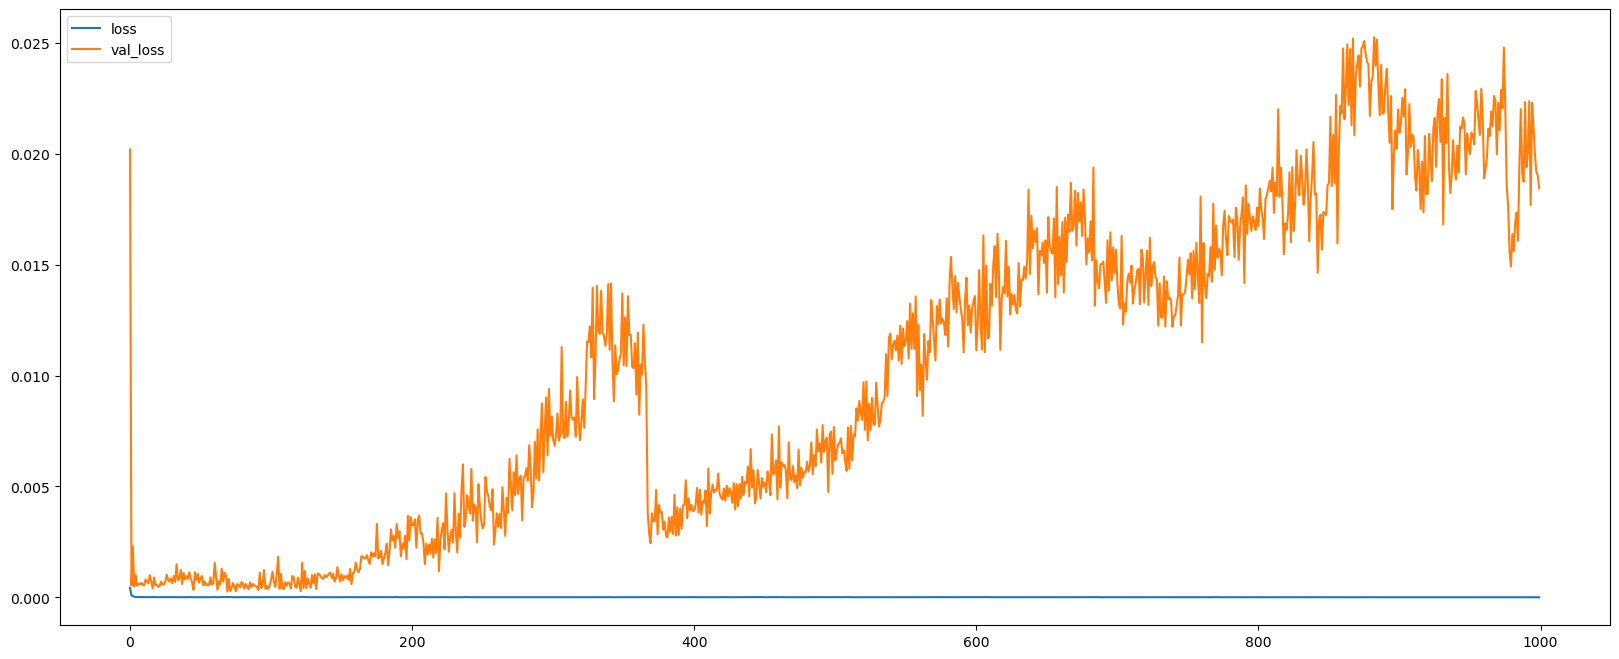

In [40]:
# Grafica para ver la diferencia entre loss y val_loss

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
# plt.ylim(0, 1)
plt.show()

### **Predicciones con 1 - Step Predictions y Multiple - Step Predictions**

In [41]:
# "1 - Step Predictions"

# Toma un valor y predice el siguiente

validation_target = y[300:]
validation_predictions = list()

i = 300

while len(validation_predictions) < len(validation_target):
    
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # Predice el siguiente valor de X[i]
    i += 1
    
    validation_predictions.append(p)

1/1 [==============================] - 0s 21ms/step


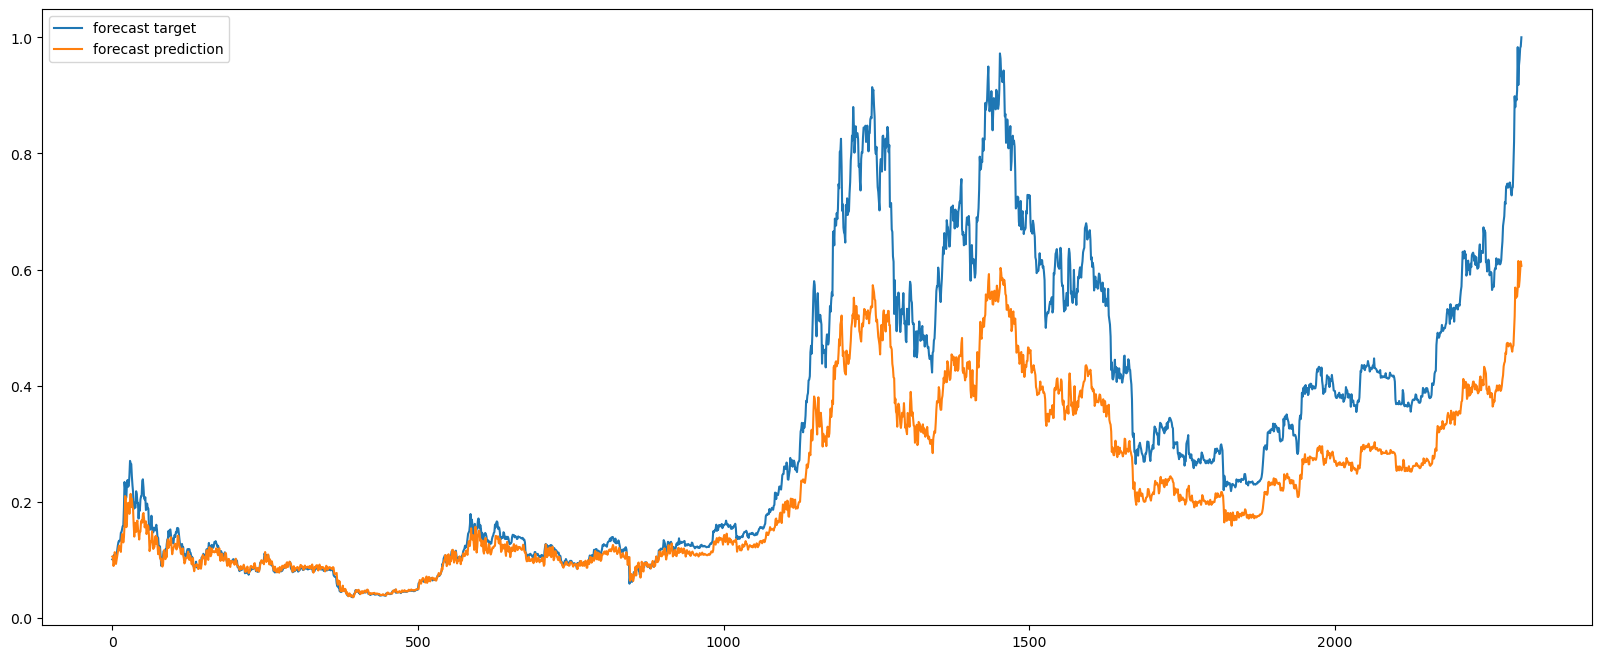

In [42]:
# Grafica entre forecast target y forecast prediction con 1 - Step Predictions

plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

In [43]:
# "Multiple - Step Predictions"

# Toma el último valor de una serie y predice el siguiente
# Usa esa predicción para seguir haciendo predicciones.

validation_target = y[300:]
validation_predictions = list()

last_x = X[300]

while len(validation_predictions) < len(validation_target):
    
    # En la primera iteración predice el siguiente valor de usando X
    # En las siguientes iteraciones usa el valor predicho anterior para predecir el siguiente
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    print(f"Valor: {last_x[-1][0]}\tPredicción: {p}")
    last_x = np.roll(last_x, -1) # Desplaza los elementos en last_x hacia atras, dejando el primer elemento al final
    
    last_x[-1] = p # Cambia el último elemento a la predicción

1/1 [==============================] - 0s 23ms/step
Valor: 0.10295885132359549	Predicción: 0.10565733164548874
1/1 [==============================] - 0s 19ms/step
Valor: 0.10565733164548874	Predicción: 0.10819488018751144
1/1 [==============================] - 0s 20ms/step
Valor: 0.10819488018751144	Predicción: 0.09565930813550949
1/1 [==============================] - 0s 19ms/step
Valor: 0.09565930813550949	Predicción: 0.08675756305456161
1/1 [==============================] - 0s 20ms/step
Valor: 0.08675756305456161	Predicción: 0.08763330429792404
1/1 [==============================] - 0s 20ms/step
Valor: 0.08763330429792404	Predicción: 0.08709646016359329
1/1 [==============================] - 0s 19ms/step
Valor: 0.08709646016359329	Predicción: 0.08371331542730331
1/1 [==============================] - 0s 19ms/step
Valor: 0.08371331542730331	Predicción: 0.0853404626250267
1/1 [==============================] - 0s 19ms/step
Valor: 0.0853404626250267	Predicción: 0.08883615583181381
1/1

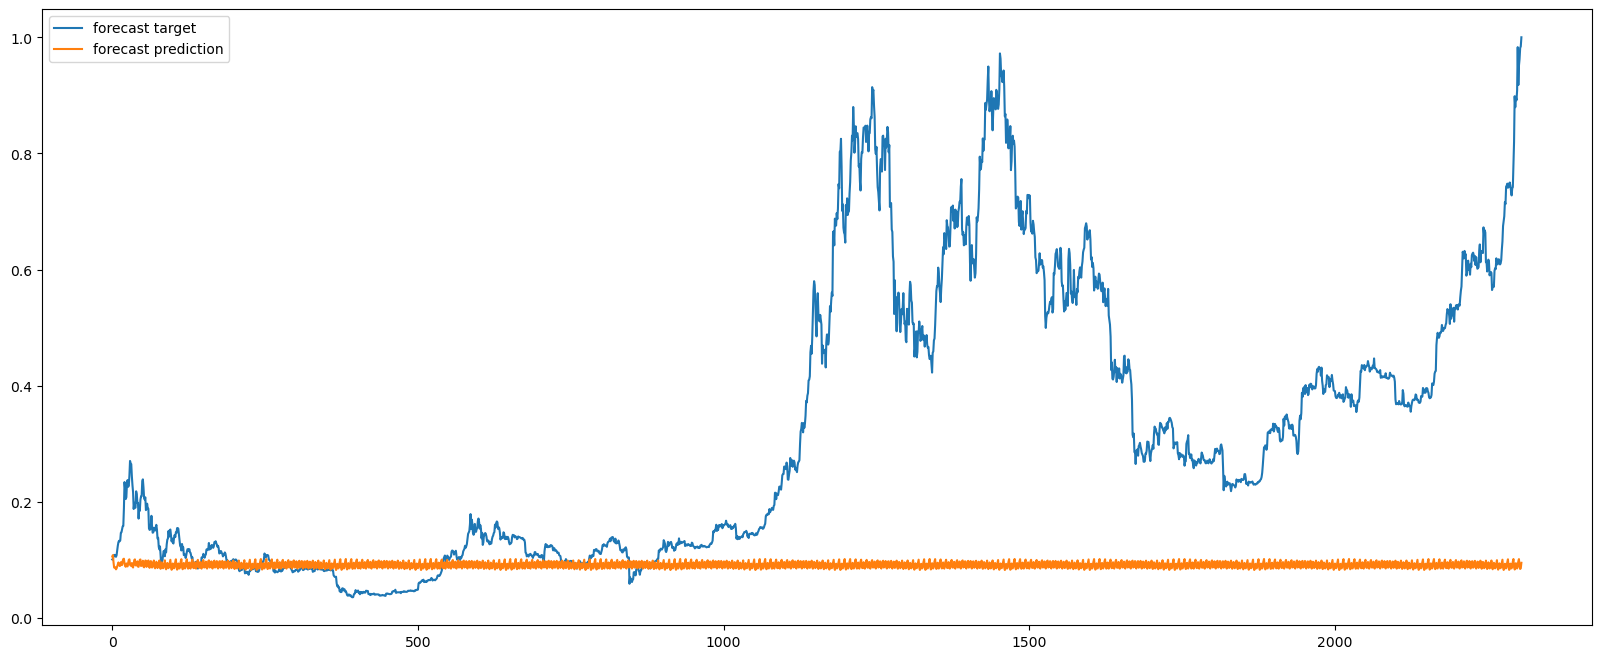

In [44]:
# Grafica entre forecast target y forecast prediction con Multiple - Step Predictions

plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

#### **Conclusiones**: *Al aplicar los modelos de prediccion, el 1-Step Prediction se asemeja mucho mas al target, en cambio el Multiple - Step Prediction, no se asemeja al target*